<a href="https://colab.research.google.com/github/mahimarohatgi12/sharing-github/blob/main/Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project on Classification Model**

In [ ]:
#Importing the libraries 
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [ ]:
#Start by connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')    

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Importing csv file from My drive to google colab
from google.colab import files
df = pd.read_csv('/content/gdrive/My Drive/abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
#Statistical Details of data
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
# Check missing values
print(df.isna().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


In [ ]:
#Information on Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
# Label Encoding
#Changing Sex into Numerical values by encoding and labelling
encode_sex = {'F': 0, 'M': 1, 'I': 2}
df2['Sex'] = df['Sex'].replace(encode_sex)
df2.head()

,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,2


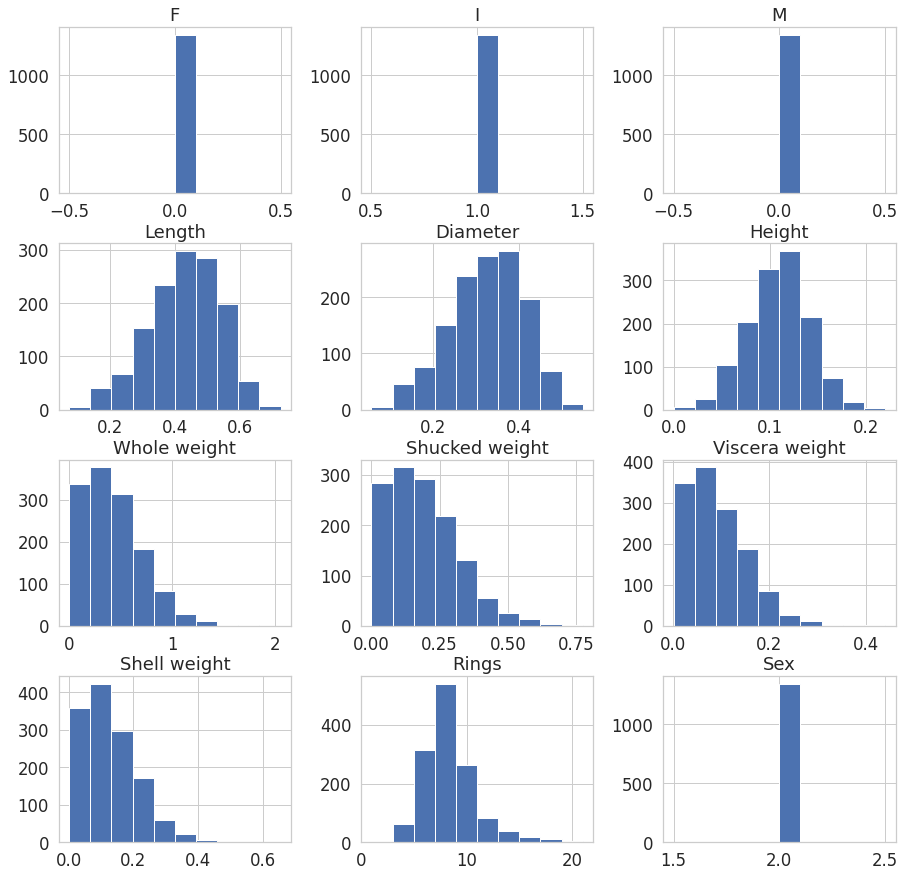

In [ ]:
#Plotting Histogram with respect to Gender/Sex and other columns
fig1 = df2[df2['Sex'] == 2]
fig1.hist(figsize=(15,15))
plt.show()

In [ ]:
#Defining our X and Y values taking for training & testing
y=df2['Rings'].values
print(y)
X=df2.drop(['Rings'],axis=1).values
print(X)

[15  7  9 ...  9 10 12]
[[0.     0.     1.     ... 0.101  0.15   1.    ]
 [0.     0.     1.     ... 0.0485 0.07   1.    ]
 [1.     0.     0.     ... 0.1415 0.21   0.    ]
 ...
 [0.     0.     1.     ... 0.2875 0.308  1.    ]
 [1.     0.     0.     ... 0.261  0.296  0.    ]
 [0.     0.     1.     ... 0.3765 0.495  1.    ]]


In [ ]:
# Performing Normalizer to make our data accurate
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
normalizedX

array([[0.        , 0.        , 0.6089673 , ..., 0.0615057 , 0.09134509,
        0.6089673 ],
       [0.        , 0.        , 0.66389475, ..., 0.0321989 , 0.04647263,
        0.66389475],
       [0.6960966 , 0.        , 0.        , ..., 0.09849767, 0.14618029,
        0.        ],
       ...,
       [0.        , 0.        , 0.47328581, ..., 0.13606967, 0.14577203,
        0.47328581],
       [0.55182308, 0.        , 0.        , ..., 0.14402582, 0.16333963,
        0.        ],
       [0.        , 0.        , 0.35516529, ..., 0.13371973, 0.17580682,
        0.35516529]])

In [ ]:
# Dividing data in train_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(normalizedX,y,test_size=0.25,
                                               random_state=0)

#Defining data used for train & test
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(X_test)

(4177, 11)
(3132, 11)
(1045, 11)
[[0.         0.         0.52724868 ... 0.12812143 0.17662831 0.52724868]
 [0.         0.41065534 0.         ... 0.05872371 0.07946181 0.82131069]
 [0.         0.         0.45962967 ... 0.1719015  0.14593242 0.45962967]
 ...
 [0.         0.         0.57874417 ... 0.09317781 0.10996139 0.57874417]
 [0.         0.         0.44011325 ... 0.13511477 0.18000632 0.44011325]
 [0.568225   0.         0.         ... 0.12472539 0.20285632 0.        ]]


In [167]:
#Loading Model 1 Perceptron
from sklearn.linear_model import Perceptron
model1 = Perceptron()

In [169]:
#Applying fitting and predicting them
model1.fit(X_train,y_train)
y_pred_train=model1.predict(X_train)
y_pred_test=model1.predict(X_test)
y_pred_train
y_pred_test, y_test

(array([16,  8, 12, ...,  8, 12, 10]), array([13,  8, 11, ..., 15, 10,  9]))

In [170]:
#Performing metrics
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_pred_train,y_train)
test_acc=accuracy_score(y_pred_test,y_test)
print('Training accuracy=',train_acc)
print('Testing acuuracy=',test_acc)

Training accuracy= 0.1893358876117497
Testing acuuracy= 0.19904306220095694


In [171]:
#Checking out Classification report
from sklearn.metrics import classification_report
cr=classification_report(y_pred_test,y_test)
print(cr)

              precision    recall  f1-score   support

           3       0.29      0.17      0.21        12
           4       0.00      0.00      0.00         0
           5       0.75      0.30      0.43        99
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.77      0.24      0.36       452
           9       0.00      0.00      0.00         0
          10       0.23      0.16      0.19       195
          11       0.00      0.00      0.00         0
          12       0.18      0.18      0.18        96
          13       0.24      0.11      0.15       111
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.50      0.10      0.17        78
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          20       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [172]:
#Performing Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred_test,y_test)
print(cm)

[[  2   0   4   1   0   1   1   1   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  5  13  30  24  20   5   1   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   6  36  82 107  80  54  41  22   7   8   3   2   0   1   2   1
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   1   5  14  42  32  41  28   9   6   5   3   3   1   4   0
    0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   1   5   8  25  20  17  11   2   2   0   3   1   1   0
    0   0   0   0

In [173]:
#loading our Model 2 a logisticregression
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

In [174]:
#Applying fitting and predicting model
model2.fit(X_train,y_train)
y_pred_train=model2.predict(X_train)
y_pred_test=model2.predict(X_test)
y_pred_train
y_pred_test, y_test

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



(array([10,  8, 10, ...,  9, 10, 10]), array([13,  8, 11, ..., 15, 10,  9]))

In [175]:
# Finding out Accuracy score/metrics
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_pred_train,y_train)
test_acc=accuracy_score(y_pred_test,y_test)
print('Training accuracy=',train_acc)
print('Testing acuuracy=',test_acc)

Training accuracy= 0.2624521072796935
Testing acuuracy= 0.23253588516746412


In [176]:
#Finding classification report
from sklearn.metrics import classification_report
cr=classification_report(y_pred_test,y_test)
print(cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.25      0.23      0.24        69
           7       0.41      0.36      0.38       132
           8       0.42      0.32      0.36       186
           9       0.35      0.20      0.26       263
          10       0.36      0.16      0.22       310
          11       0.15      0.21      0.17        85
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          20       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [177]:
#Taking out Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred_test,y_test)
print(cm)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5 13 25 16  7  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0 12 33 47 15 10  7  5  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  8 29 59 32 19 16  8  4  3  2  2  0  1  0  1  0  0  0  0  0]
 [ 0  0  1  4 26 47 53 45 26 23 14 11  4  4  1  0  3  1  0  0  0  0  0]
 [ 0  0  0  2  5 14 54 50 56 48 21 14 13  9  5  5  4  6  1  1  2  0  0]
 [ 0  0  0  0  0  1  3 18 18 14 11  4  3  1  6  0  3  0  1  0  0  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [178]:
# KNN Model 3
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier()

In [179]:
model3.fit(X_train, y_train)
y_pred_train=model3.predict(X_train)
y_pred_test=model3.predict(X_test)
y_pred_train
y_pred_test, y_test

(array([19,  8,  9, ..., 12,  9, 11]), array([13,  8, 11, ..., 15, 10,  9]))

In [180]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_pred_train,y_train)
test_acc=accuracy_score(y_pred_test,y_test)
print('Training accuracy=',train_acc)
print('Testing acuuracy=',test_acc)

Training accuracy= 0.45338441890166026
Testing acuuracy= 0.20669856459330144


In [181]:
# Decision tree Classifier Model 4
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()

In [182]:
#fit and predict
model4.fit(X_train,y_train)
y_pred_train=model4.predict(X_train)
y_pred_test=model4.predict(X_test)
y_pred_train
y_pred_test, y_test

(array([13,  7,  9, ..., 12, 11, 14]), array([13,  8, 11, ..., 15, 10,  9]))

In [183]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_pred_train,y_train)
test_acc=accuracy_score(y_pred_test,y_test)
print('Training accuracy=',train_acc)
print('Testing acuuracy=',test_acc)

Training accuracy= 1.0
Testing acuuracy= 0.2


In [184]:
# Gauss Naive Bayes Model 5
from sklearn.naive_bayes import GaussianNB
model5= GaussianNB()

In [185]:
#fit and predict
model5.fit(X_train,y_train)
y_pred_train=model5.predict(X_train)
y_pred_test=model5.predict(X_test)
y_pred_train
y_pred_test, y_test

(array([20,  7, 20, ..., 20, 20, 23]), array([13,  8, 11, ..., 15, 10,  9]))

In [186]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_pred_train,y_train)
test_acc=accuracy_score(y_pred_test,y_test)
print('Training accuracy=',train_acc)
print('Testing acuuracy=',test_acc)

Training accuracy= 0.06992337164750957
Testing acuuracy= 0.06124401913875598


In [187]:
df2

,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,1
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,1,0,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,0,0,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1
4174,0,0,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1
4175,1,0,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


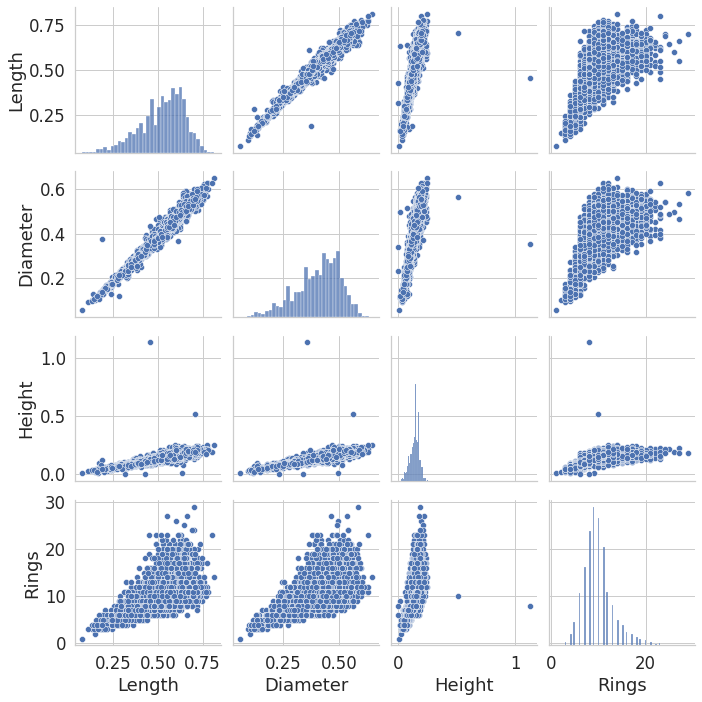

In [188]:
# EDA:Exploratory data analysis- tool in data science
cols=['Length','Diameter','Height','Rings']
import seaborn as sns
#sns.pairplot(df)
sns.pairplot(df[cols])

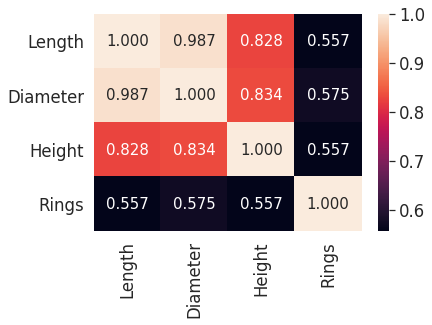

In [189]:
# correlation analysis r=0 NO correlation, r>0 positive correlation, r<0 negative correlation
# -1<=r<=1
import numpy as np
import seaborn as sns
cols=['Length','Diameter','Height','Rings']
cm=np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.5)
# heat map
hm=sns.heatmap(cm,cbar=True,annot=True,square=False,fmt='.3f',annot_kws={'size':15},
               yticklabels=cols,xticklabels=cols)

##**INTERPRETATION**

We applied 5 models in our Abolen Data including Perceptron, KNN, NB, Decision tree and Logistic Regression. If we will see the accuracy of our data, accuracy rate should be near to 0.95, which is said to be perfectly fit, but our accuracy is around 0.45 which means that this data accuracy rate is very low.
